In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf



plt.style.use('default')
ca = pd.read_csv('ACA.PA.csv', usecols=['Date','Close'])
ca["Date"] = pd.to_datetime(ca["Date"])
ca.head()
ca2 = ca.iloc[144:240].reset_index(drop=True)
ca3 = ca.iloc[144:216].reset_index(drop=True)
display(ca)
display(ca2)
display(ca3)

,Date,Close
0,2002-01-01,16.157314
1,2002-02-01,16.461349
2,2002-03-01,18.659092
3,2002-04-01,20.379063
4,2002-05-01,21.282482
...,...,...
249,2022-10-01,9.186000
250,2022-11-01,9.610000
251,2022-12-01,9.831000
252,2023-01-01,10.518000


,Date,Close
0,2014-01-01,9.617106
1,2014-02-01,11.093328
2,2014-03-01,11.021106
3,2014-04-01,10.934439
4,2014-05-01,11.021106
...,...,...
91,2021-08-01,12.210000
92,2021-09-01,11.946000
93,2021-10-01,13.040000
94,2021-11-01,12.066000


,Date,Close
0,2014-01-01,9.617106
1,2014-02-01,11.093328
2,2014-03-01,11.021106
3,2014-04-01,10.934439
4,2014-05-01,11.021106
...,...,...
67,2019-08-01,10.390000
68,2019-09-01,11.140000
69,2019-10-01,11.685000
70,2019-11-01,12.415000


# Analyse de la chronique

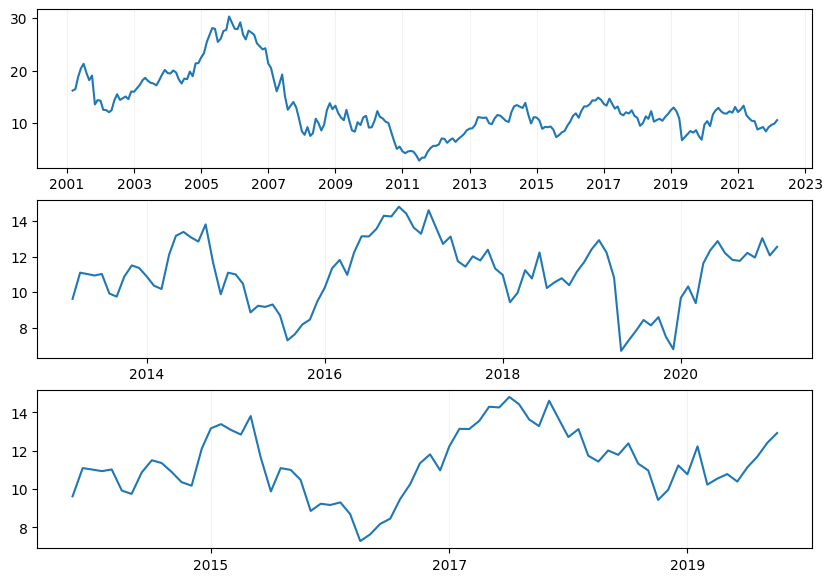

In [293]:
fig, axs = plt.subplots(3, figsize=(10, 7) )
axs[0].plot(ca["Date"], ca["Close"])
axs[1].plot(ca2["Date"], ca2["Close"])
axs[2].plot(ca3["Date"], ca3["Close"])
axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=24))
axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=24))
axs[2].xaxis.set_major_locator(mdates.MonthLocator(interval=24))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axs[0].grid(axis='x', color='0.95')
axs[1].grid(axis='x', color='0.95')
axs[2].grid(axis='x', color='0.95')
plt.show()

# Test hétéro
Dans les deux cas : hetero donc trans box cox

In [294]:
import statsmodels.stats.diagnostic as sm

print(sm.het_arch(ca3["Close"],nlags=8))
print(sm.het_arch(ca3["Close"],nlags=8))

(50.77755015639532, 2.8961132425986156e-08, 26.401738063242906, 3.2163978105547136e-16)
(50.77755015639532, 2.8961132425986156e-08, 26.401738063242906, 3.2163978105547136e-16)


# Trans box cox

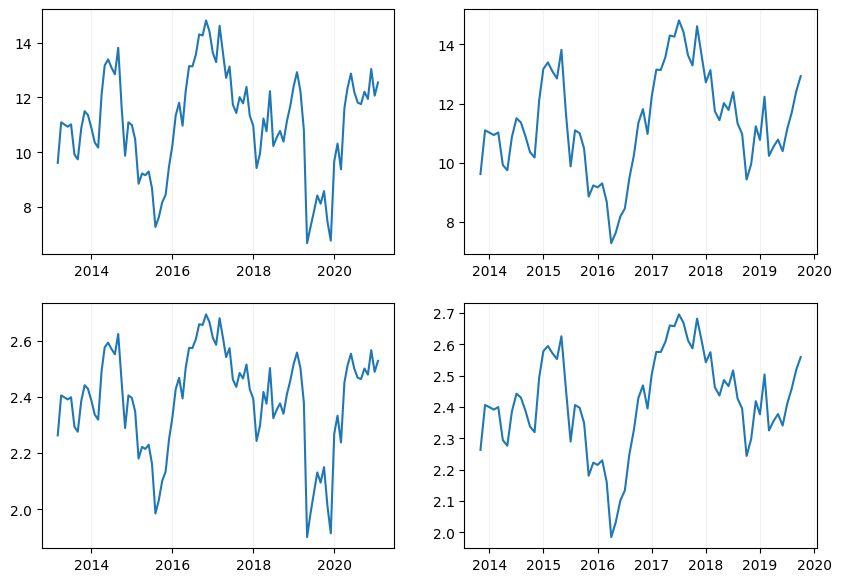

In [295]:
ca2["log"] = np.log(ca2["Close"])
ca3["log"] = np.log(ca3["Close"])
fig, axs = plt.subplots(2,2, figsize=(10, 7) )
axs[0,0].plot(ca2["Date"], ca2["Close"])
axs[1,0].plot(ca2["Date"], ca2["log"])
axs[0,1].plot(ca3["Date"], ca3["Close"])
axs[1,1].plot(ca3["Date"], ca3["log"])

axs[0,0].xaxis.set_major_locator(mdates.MonthLocator(interval=24))
axs[1,0].xaxis.set_major_locator(mdates.MonthLocator(interval=24))
axs[0,1].xaxis.set_major_locator(mdates.MonthLocator(interval=12))
axs[1,1].xaxis.set_major_locator(mdates.MonthLocator(interval=12))

axs[0,0].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axs[1,0].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axs[0,1].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axs[1,1].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

axs[0,0].grid(axis='x', color='0.95')
axs[1,0].grid(axis='x', color='0.95')
axs[0,1].grid(axis='x', color='0.95')
axs[1,1].grid(axis='x', color='0.95')
plt.show()

ca2.to_csv(r'ca2.csv')
ca3.to_csv(r'ca3.csv')



Buys Ballot

In [296]:
mois=['Janvier', 'Févirer', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet',
             'Aout', 'Septembre', 'Octobre', 'Novembre', 'Décembre']
buysballot_2 = pd.DataFrame(
    index=[[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]],
    columns=mois)

buysballot_3 = pd.DataFrame(
    index=[[2014, 2015, 2016, 2017, 2018, 2019]],
    columns=mois)

for i in range(0,ca2['log'].size, 12):
    buysballot_2.loc[2014+(i/12)] =  ca2['log'].iloc[i:i+12].tolist()


for i in range(0,ca3['log'].size, 12):
    buysballot_3.loc[2014+(i/12)] =  ca3['log'].iloc[i:i+12].tolist()

buysballot_2.append()



,Janvier,Févirer,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Décembre
2014,2.263543,2.406344,2.399812,2.391917,2.399812,2.294403,2.276773,2.385734,2.442572,2.429935,2.387504,2.338095
2015,2.319806,2.493572,2.577829,2.594508,2.571961,2.553026,2.625661,2.454224,2.290025,2.406344,2.397625,2.349185
2016,2.181028,2.222563,2.215444,2.230149,2.162258,1.98513,2.03165,2.101148,2.134508,2.247902,2.327819,2.428662
2017,2.469009,2.395434,2.503861,2.575999,2.575266,2.60737,2.660259,2.657562,2.695327,2.668975,2.612327,2.586928
2018,2.681909,2.610913,2.542855,2.574899,2.463002,2.436679,2.486156,2.466743,2.516567,2.427278,2.394982,2.243896
2019,2.298477,2.418767,2.376764,2.503892,2.325325,2.355652,2.377693,2.340844,2.410542,2.458306,2.518905,2.559163
2020,2.503892,2.380472,1.900614,1.985406,2.057196,2.131559,2.095069,2.150366,2.011163,1.914272,2.269442,2.334084
2021,2.23858,2.452297,2.513251,2.555054,2.5016,2.469285,2.464704,2.502255,2.480396,2.568022,2.490392,2.529721


,Janvier,Févirer,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Décembre
2014,2.263543,2.406344,2.399812,2.391917,2.399812,2.294403,2.276773,2.385734,2.442572,2.429935,2.387504,2.338095
2015,2.319806,2.493572,2.577829,2.594508,2.571961,2.553026,2.625661,2.454224,2.290025,2.406344,2.397625,2.349185
2016,2.181028,2.222563,2.215444,2.230149,2.162258,1.98513,2.03165,2.101148,2.134508,2.247902,2.327819,2.428662
2017,2.469009,2.395434,2.503861,2.575999,2.575266,2.60737,2.660259,2.657562,2.695327,2.668975,2.612327,2.586928
2018,2.681909,2.610913,2.542855,2.574899,2.463002,2.436679,2.486156,2.466743,2.516567,2.427278,2.394982,2.243896
2019,2.298477,2.418767,2.376764,2.503892,2.325325,2.355652,2.377693,2.340844,2.410542,2.458306,2.518905,2.559163


# Analyse de la variance
- $SCA = N * \sum (x_{i\cdot} - x_{\cdot\cdot})^3$ 
- $SCP = P \sum (x_{\cdot j} - x_{\cdot\cdot})^3$
- $SCR = \sum\sum(x_{ij} - x_{i\cdot} - x_{\cdot j} + x_{\cdot\cdot})^3$

In [297]:
for i in range()

SyntaxError: expected ':' (1816844243.py, line 1)

(array([ 5.,  4.,  8., 15., 13., 22., 18., 13.,  7.,  5.]),
 array([ 6.69     ,  7.5020363,  8.3140726,  9.1261089,  9.9381452,
        10.7501815, 11.5622178, 12.3742541, 13.1862904, 13.9983267,
        14.810363 ]),
 <BarContainer object of 10 artists>)

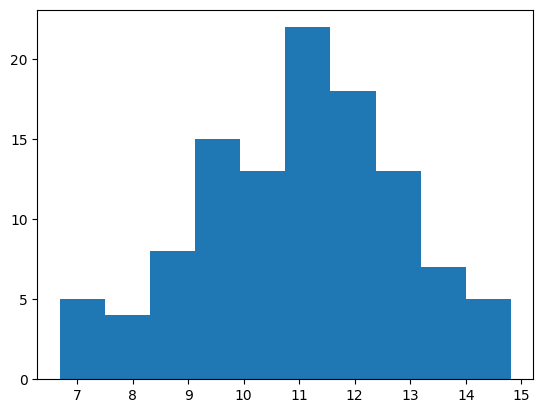

In [ ]:
plt.hist(ca3["Close"])

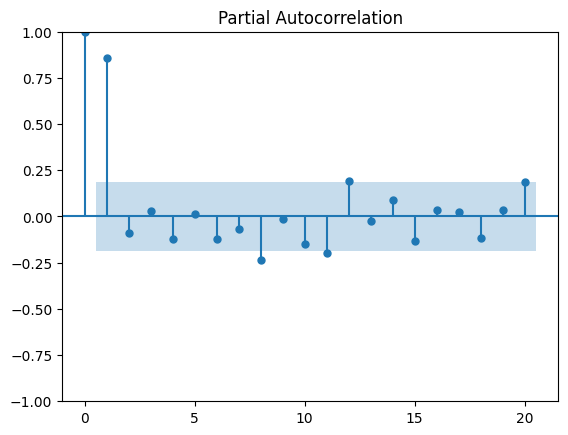

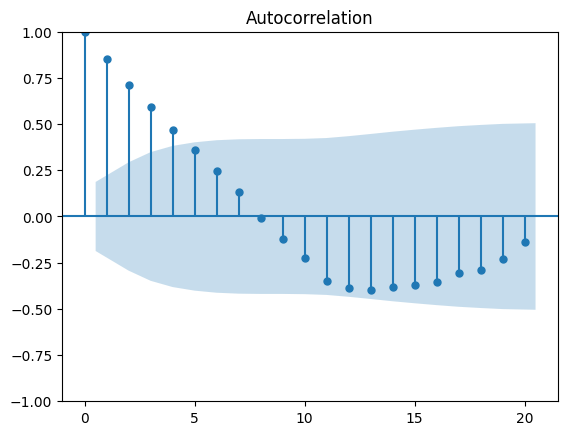

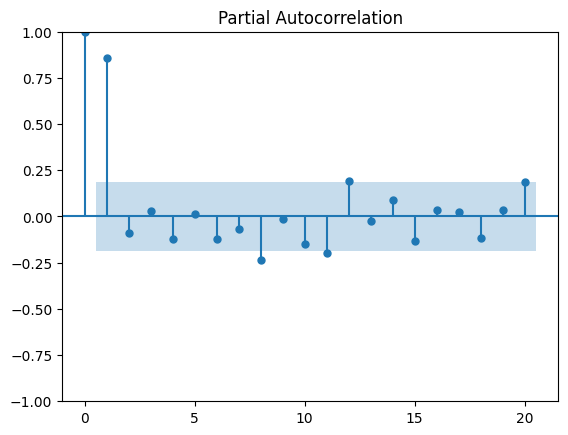

In [ ]:
plot_acf(ca3['Close'], lags = 30)
plot_pacf(ca3['Close'], lags = 30, method = "ols")


In [ ]:
ca['MM'] = ca.rolling(window = 13, center=True).mean()
display(ca)

/tmp/ipykernel_873/4182036287.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  ca['MM'] = ca.rolling(window = 12, center=True).mean()


,Date,Close,MM
0,2002-01-01,16.157314,NaN
1,2002-02-01,16.461349,NaN
2,2002-03-01,18.659092,NaN
3,2002-04-01,20.379063,NaN
4,2002-05-01,21.282482,NaN
...,...,...,...
249,2022-10-01,9.186000,NaN
250,2022-11-01,9.610000,NaN
251,2022-12-01,9.831000,NaN
252,2023-01-01,10.518000,NaN


<AxesSubplot: >

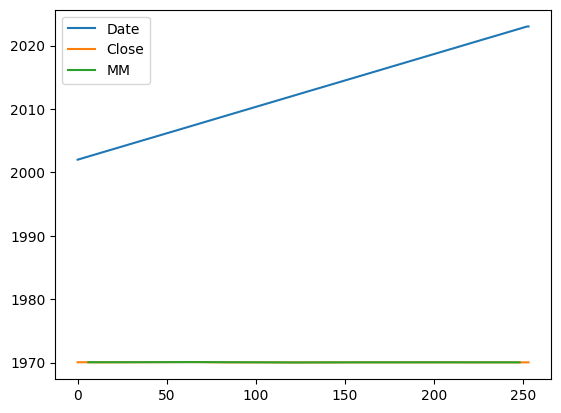

In [ ]:
ca.plot()